In [12]:
from PIL import Image, ImageFilter
import csv
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def down_sampling_and_save_as_csv(load_path, save_path, label):
    image=cv2.imread(load_path,cv2.IMREAD_COLOR)
    resized_image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_LANCZOS4)
    new_size = resized_image.size
    print("New size:", new_size)
    pixels = np.array(resized_image).reshape(3,32,32).transpose(0,1,2).flatten()
    with open(save_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([f"pixel_{i}" for i in range(pixels.shape[0])] + ['label'])
        writer.writerow(list(pixels) + [label])

In [14]:
url_load='./pictures/before_sampling/pic_ship/ship3.png'
url_save='./pictures/before_rotate/ship3.csv'
down_sampling_and_save_as_csv(url_load,url_save,0)

New size: 3072


### read  the csv and show the img

(32, 32, 3)


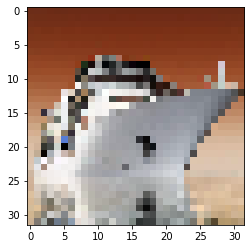

In [15]:
import pandas as pd
file='./pictures/before_rotate/ship3.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file, usecols=lambda x: x != 'label')
pic=np.array(df).reshape(32,32,3)
plt.imshow(pic)
print(pic.shape)


#### save the right demenetions to a new img

In [16]:
status=cv2.imwrite('./pictures/before_rotate/ship3.jpg',pic)
print(f'The operation was successfull?: {status}')

The operation was successfull?: True


(32, 32, 3)


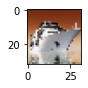

In [17]:
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(pic)
print(pic.shape)

# Rotating:
* cv2.ROTATE_180
* cv2.ROTATE_90_CLOCKWISE

In [19]:
input_image_path = './pictures/before_rotate/ship3.jpg'

# Read the input image
img = cv2.imread(input_image_path)
img_cw_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
output_directory = './pictures/after_rotate'
output_filename = os.path.join(output_directory, 'rotated_ship3.jpg')
cv2.imwrite(output_filename, img_cw_90)

True

In [21]:
url_load='./pictures/after_rotate/rotated_ship3.jpg'
url_save='./pictures/after_rotate/ship3.csv'
down_sampling_and_save_as_csv(url_load,url_save,0)

New size: 3072


### rotate in 30 degres without taking care of pixels

In [23]:
import cv2 

from matplotlib import pyplot as plt 

image = cv2.imread('./pictures/before_sampling/pic_truck/truck1.png') 

rows,cols,channels= image.shape 

M = cv2.getRotationMatrix2D((cols/2,rows/2),-30,1) 

rotate_30 = cv2.warpAffine(image,M,(cols,rows)) 


In [25]:
output_directory = './pictures/after_rotate'
output_filename = os.path.join(output_directory, 'rotated_truck3.jpg')
cv2.imwrite(output_filename, rotate_30)

True

### see the img 

In [38]:
url_load='./pictures/after_rotate/rotated_truck3.jpg'
url_save='./pictures/after_rotate/truck3.csv'
down_sampling_and_save_as_csv(url_load,url_save,0)


New size: 3072


(32, 32, 3)


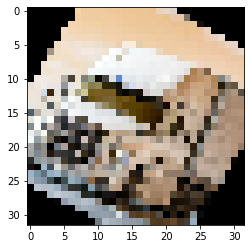

In [39]:
import pandas as pd
file='./pictures/after_rotate/truck3.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file, usecols=lambda x: x != 'label')
pic=np.array(df).reshape(32,32,3)
plt.imshow(pic)
print(pic.shape)

(32, 32, 3)


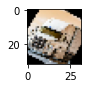

In [40]:
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(pic)
print(pic.shape)

### rotate 30 degres taking care of pixels- Brachi's code 

In [30]:
import cv2
import math
import numpy as np

def rotate_image_with_padding(input_image, angle):
    # Load the input image using OpenCV
    image = cv2.imread(input_image)
    print("image ", image.shape)
    # Calculate the dimensions of the rotated image
    height, width = image.shape[:2]
    radians = math.radians(angle)
    new_width = int(abs(width * math.cos(radians)) + abs(height * math.sin(radians)))
    new_height = int(abs(width * math.sin(radians)) + abs(height * math.cos(radians)))

    # Calculate the center of the original image
    center_x = width // 2
    center_y = height // 2

    # Create an empty canvas with the dimensions of the rotated image
    canvas = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Calculate the coordinates for the rotated image
    x = (new_width - width) // 2
    y = (new_height - height) // 2

    # Paste the original image onto the canvas
    canvas[y:y+height, x:x+width] = image

    # Perform the rotation with padding
    M = cv2.getRotationMatrix2D((new_width//2, new_height//2), angle, 1.0)
    rotated_image = cv2.warpAffine(canvas, M, (new_width, new_height))

    # Return the rotated image
    return rotated_image


In [32]:

# Example usage
input_image = './pictures/before_sampling/pic_horse/horse1.png'
angle = 30

rotated_image = rotate_image_with_padding(input_image, angle)
print(rotated_image.shape)
output_directory = './pictures/after_rotate'
output_filename = os.path.join(output_directory, 'rotated_horse1.jpg')
cv2.imwrite(output_filename, rotated_image)


image  (707, 663, 3)
(943, 927, 3)


True

In [33]:
url_load='./pictures/after_rotate/rotated_horse1.jpg'
url_save='./pictures/after_rotate/horse1.csv'
down_sampling_and_save_as_csv(url_load,url_save,0)

New size: 3072


### the rotate function above enlarges the image- becuase of adding the padding+the full picture rotated, this is to ensure not to loss pixels and cut the picture, so thats why we need to call down-samlinf function

(32, 32, 3)


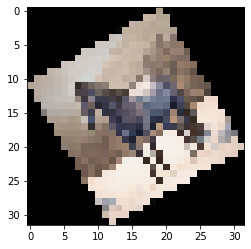

In [36]:
import pandas as pd
file='./pictures/after_rotate/horse1.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file, usecols=lambda x: x != 'label')
pic=np.array(df).reshape(32,32,3)
plt.imshow(pic)
print(pic.shape)

(32, 32, 3)


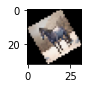

In [37]:
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(pic)
print(pic.shape)